In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import mplfinance.original_flavor as mpl

In [2]:
data_dir = '/work/data'
entries = os.listdir(data_dir)
main_df = pd.DataFrame()
for  e in entries:
    if 'csv' in e and 'AMZN' not in e:
        df = pd. read_csv(os.path.join(data_dir, e))
        df.set_index('Date', inplace=True)
        df.rename(columns={'Adj Close': e[:-4]}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
        if main_df.empty: 
            main_df = df
        else:
            main_df = main_df.merge(df, how='outer', on='Date')

In [3]:
main_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,CCI,CCL,CDNS,CDW,CE,CERN,CF,CFG,CHD,CHRW
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,20.286341,4.562870,39.254593,26.061205,NaN,22.222189,8.730000,17.996279,33.262230,36.779999,...,30.937769,23.455093,5.990000,NaN,27.468046,20.343739,11.348292,NaN,11.163175,46.077232
2010-01-04,20.436504,4.496876,39.157616,26.466835,NaN,22.699533,8.740000,18.152946,33.719078,37.090000,...,31.389481,23.728943,6.120000,NaN,28.460651,20.795326,11.480803,NaN,11.327529,46.555805
2010-01-05,20.214516,5.005957,38.924889,26.512596,NaN,22.537582,8.530000,18.006285,33.927479,37.700001,...,31.690609,23.958391,6.060000,NaN,29.093880,22.024244,11.667064,NaN,11.174255,45.590801
2010-01-06,20.142689,4.798555,39.264290,26.090879,NaN,22.324482,8.400000,18.106277,34.288147,37.619999,...,31.238918,23.529108,6.130000,NaN,29.410486,22.256210,12.153352,NaN,11.227811,44.986675
2010-01-07,20.116571,4.939965,39.254593,26.042646,NaN,21.966461,8.400000,18.256275,34.256084,36.889999,...,30.723808,23.788158,6.250000,NaN,29.564510,22.386997,12.030843,NaN,11.102233,44.555195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-16,87.440002,17.030001,142.420059,352.079987,96.059998,99.110001,249.139999,89.739998,204.399994,411.670013,...,169.589996,20.420000,92.019997,119.370003,89.900002,69.440002,30.809999,27.240000,74.739998,78.089996
2020-06-17,87.919998,16.980000,148.389999,351.589996,95.739998,100.150002,254.729996,90.900002,205.199997,413.489990,...,169.449997,19.090000,93.070000,117.180000,89.059998,69.610001,30.230000,26.370001,75.370003,78.639999
2020-06-18,88.209999,16.490000,147.710007,351.730011,96.230003,100.250000,253.360001,90.279999,202.929993,420.459991,...,165.250000,18.820000,93.730003,117.239998,88.139999,69.720001,29.990000,26.150000,77.820000,77.860001


In [4]:
main_df.loc[:, main_df.isna().any()]

,ABBV,ALLE,AMCR,ANET,APTV,CARR,CBOE,CDW,CFG
Date,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-06-16,96.059998,104.529999,10.26,229.559998,76.150002,22.070000,101.449997,119.370003,27.240000
2020-06-17,95.739998,104.250000,10.27,226.539993,76.050003,21.260000,101.040001,117.180000,26.370001
2020-06-18,96.230003,102.989998,10.28,219.449997,76.610001,21.250000,100.250000,117.239998,26.150000


In [5]:
df = pd.read_csv(os.path.join(data_dir, "AMZN.csv"), index_col=0, parse_dates=True)

In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000


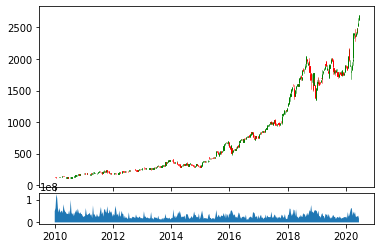

In [7]:
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume= df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)

ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()

mpl.candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()

In [8]:
rate_increase_in_vol = [0]
rate_increase_in_adj_close = [0]

i = 1
while i < len(df):
    rate_increase_in_vol.append(df.iloc[i]['Volume'] - df.iloc[i - 1]['Volume'])
    rate_increase_in_adj_close.append(df.iloc[i]['Adj Close'] - df.iloc[i - 1]['Adj Close'])
    i+=1
    
df['Increase_in_vol'] = rate_increase_in_vol
df['Increase_in_adj_close'] = rate_increase_in_adj_close

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
df_main = df.reset_index().drop('Date', axis=1)

In [11]:
df_train = df_main[:2200]
df_target=df_train[['High','Low','Open','Close']]

In [12]:
df_train.head()

,High,Low,Open,Close,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close
0,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,0.0,0.000000
1,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,3076900.0,-0.620010
2,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,1252000.0,0.790009
3,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,-1673100.0,-2.440002
4,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,3851400.0,-2.250000


In [13]:
df_target.head()

,High,Low,Open,Close
0,137.279999,134.520004,137.089996,134.520004
1,136.610001,133.139999,136.250000,133.899994
2,135.479996,131.809998,133.429993,134.690002
3,134.729996,131.649994,134.600006,132.250000
4,132.320007,128.800003,132.009995,130.000000


In [14]:
sc = MinMaxScaler(feature_range = (0, 1))
target_set=df_target.values
train_set=df_train.values
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

In [15]:
X_train = []
y_train = []

for i in range(50, len(train_set)):
    X_train.append(training_set_scaled[i-50:i, :])
    y_train.append(target_set[i, :])

X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
def create_dataset(source, target):
    X = []
    y = []

    for i in range(50, len(source)):
        X.append(source[i-50:i, :])
        y.append(target[i, :])

    X, y = np.array(X), np.array(y)
    return X, y

In [16]:
X_train.shape

(2150, 50, 8)

In [17]:
y_train.shape

(2150, 4)

In [18]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [19]:
def model():
    mod=Sequential()
    mod.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 8)))
    #mod.add(LSTM(units = 64, input_shape = (X_train.shape[1], 8)))
    #mod.add(Dropout(0.2))
    mod.add(BatchNormalization())
    # mod.add(LSTM(units = 64, return_sequences = True))
    mod.add(LSTM(units = 64))
    #mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
   
    #mod.add((LSTM(units = 64)))
    #mod.add(Dropout(0.1))
    #mod.add(BatchNormalization())
    #mod.add((Dense(units = 16, activation='tanh')))
    #mod.add(BatchNormalization())
    mod.add((Dense(units = 4, activation='tanh')))
    mod.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mean_squared_error'])
    mod.summary()
    
    return mod


In [20]:
RNN_model = model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 64)            18688     
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 64)            256       
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 4)                 260       
Total params: 52,484
Trainable params: 52,228
Non-trainable params: 256
_________________________________________________________________


In [21]:
# callback = tf.keras.callbacks.ModelCheckpoint(filepath='./RNN_model..h5', 
#                                                                      monitor='mean_squared_error', 
#                                                                       verbose=0,
#                                                                      save_best_only=True,
#                                                                      save_weights_only=False,
#                                                                      mode='auto',
#                                                                      save_freq='epoch')
RNN_model.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
68/68 [==============================] - 9s 76ms/step - loss: 457834.1214 - accuracy: 0.1847 - mean_squared_error: 457834.1214
Epoch 2/200
68/68 [==============================] - 4s 60ms/step - loss: 489929.6639 - accuracy: 0.2690 - mean_squared_error: 489929.6639
Epoch 3/200
68/68 [==============================] - 4s 63ms/step - loss: 468645.0290 - accuracy: 0.2552 - mean_squared_error: 468645.0290
Epoch 4/200
68/68 [==============================] - 4s 61ms/step - loss: 487502.4248 - accuracy: 0.2634 - mean_squared_error: 487502.4248
Epoch 5/200
68/68 [==============================] - 3s 51ms/step - loss: 467587.7477 - accuracy: 0.2312 - mean_squared_error: 467587.7477
Epoch 6/200
68/68 [==============================] - 4s 54ms/step - loss: 454565.2169 - accuracy: 0.4097 - mean_squared_error: 454565.2169
Epoch 7/200
68/68 [==============================] - 4s 52ms/step - loss: 478279.6182 - accuracy: 0.0432 - mean_squared_error: 478279.6182
Epoch 8/200
68/68 [========

68/68 [==============================] - 4s 53ms/step - loss: 452906.3053 - accuracy: 0.0016 - mean_squared_error: 452906.3053
Epoch 60/200
68/68 [==============================] - 4s 59ms/step - loss: 480791.6581 - accuracy: 0.0023 - mean_squared_error: 480791.6581
Epoch 61/200
68/68 [==============================] - 4s 63ms/step - loss: 443231.6073 - accuracy: 2.2073e-04 - mean_squared_error: 443231.6073
Epoch 62/200
68/68 [==============================] - 4s 60ms/step - loss: 470070.1463 - accuracy: 3.1744e-04 - mean_squared_error: 470070.1463
Epoch 63/200
68/68 [==============================] - 4s 61ms/step - loss: 492722.6005 - accuracy: 0.0012 - mean_squared_error: 492722.6005
Epoch 64/200
68/68 [==============================] - 4s 62ms/step - loss: 478004.5408 - accuracy: 8.7382e-04 - mean_squared_error: 478004.5408
Epoch 65/200
68/68 [==============================] - 4s 62ms/step - loss: 472907.2663 - accuracy: 0.0012 - mean_squared_error: 472907.2663
Epoch 66/200
68/68 [=

68/68 [==============================] - 4s 53ms/step - loss: 475864.3560 - accuracy: 8.6359e-04 - mean_squared_error: 475864.3560
Epoch 117/200
68/68 [==============================] - 4s 56ms/step - loss: 426134.4669 - accuracy: 0.0036 - mean_squared_error: 426134.4669
Epoch 118/200
68/68 [==============================] - 4s 60ms/step - loss: 486918.8139 - accuracy: 0.0010 - mean_squared_error: 486918.8139
Epoch 119/200
68/68 [==============================] - 4s 56ms/step - loss: 471300.5362 - accuracy: 5.5566e-04 - mean_squared_error: 471300.5362
Epoch 120/200
68/68 [==============================] - 3s 50ms/step - loss: 498317.7930 - accuracy: 3.7888e-04 - mean_squared_error: 498317.7930
Epoch 121/200
68/68 [==============================] - 3s 51ms/step - loss: 456656.9923 - accuracy: 6.6588e-04 - mean_squared_error: 456656.9923
Epoch 122/200
68/68 [==============================] - 3s 51ms/step - loss: 480182.9615 - accuracy: 0.0089 - mean_squared_error: 480182.9615
Epoch 123/2

68/68 [==============================] - 4s 53ms/step - loss: 468899.3881 - accuracy: 0.0849 - mean_squared_error: 468899.3881
Epoch 175/200
68/68 [==============================] - 3s 51ms/step - loss: 457480.6658 - accuracy: 0.0787 - mean_squared_error: 457480.6658
Epoch 176/200
68/68 [==============================] - 3s 51ms/step - loss: 472358.4497 - accuracy: 0.0982 - mean_squared_error: 472358.4497
Epoch 177/200
68/68 [==============================] - 4s 52ms/step - loss: 468835.7677 - accuracy: 0.0917 - mean_squared_error: 468835.7677
Epoch 178/200
68/68 [==============================] - 4s 53ms/step - loss: 462898.0290 - accuracy: 0.1100 - mean_squared_error: 462898.0290
Epoch 179/200
68/68 [==============================] - 4s 52ms/step - loss: 446449.4950 - accuracy: 0.0998 - mean_squared_error: 446449.4950
Epoch 180/200
68/68 [==============================] - 3s 50ms/step - loss: 452707.5412 - accuracy: 0.1094 - mean_squared_error: 452707.5412
Epoch 181/200
68/68 [======

In [26]:
df_test=df_main[2200:]
df_target_test=df_test[['High','Low','Open','Close']]
target_set_test=df_target_test.values
test_set=df_test.values
testing_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)
X_test, y_test = create_dataset(testing_set_scaled, target_set_scaled)

In [27]:
predicted_stock_price = RNN_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[2050.499  2012.9994 2038.11   2039.5101]
 [2050.4988 2012.9999 2038.1096 2039.5101]
 [2050.4993 2012.9994 2038.1096 2039.5101]
 ...
 [2050.5    2013.0001 2038.11   2039.5101]
 [2050.5    2013.0001 2038.11   2039.5101]
 [2050.5    2013.0001 2038.11   2039.5101]]


In [29]:
y_test = sc.inverse_transform(y_test)

In [30]:
print(y_test)

[[ 132.28999329  130.5         131.24000549  131.78999329]
 [ 132.69000244  131.22000122  132.41000366  131.33999634]
 [ 132.8500061   130.44000244  131.02000427  132.75999451]
 ...
 [1936.88000488 1865.         1903.79003906 1934.35998535]
 [1975.91003418 1938.84997559 1942.90002441 1974.55004883]
 [1995.25       1961.52001953 1968.5        1974.84997559]]


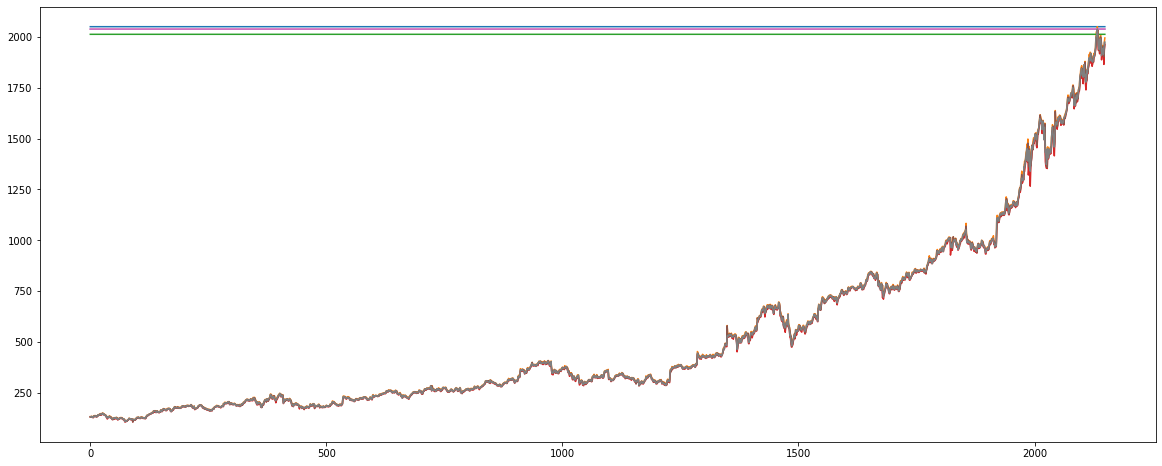

In [37]:
fig, ax = plt.subplots(figsize=(20, 8))

for i in range(predicted_stock_price.shape[1]):
    ax.plot(predicted_stock_price[:, i])
    ax.plot(y_test[:, i])

In [32]:
predicted_stock_price[:, 0]

array([2050.499 , 2050.4988, 2050.4993, ..., 2050.5   , 2050.5   ,
       2050.5   ], dtype=float32)